In [15]:
import pandas as pd
import  matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [16]:
data = load_iris()

In [17]:
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [18]:
chi2_selector = SelectKBest(score_func=chi2,k=2)
x_kbest = chi2_selector.fit_transform(x,y)
selected_chi2_features = x.columns[chi2_selector.get_support()]

In [19]:
model_lr = LogisticRegression(max_iter=1000)
rfe_selector = RFE(model_lr, n_features_to_select=2)
rfe_selector.fit(x,y)
selected_rfe_features = x.columns[rfe_selector.support_]

In [20]:
model_rf = RandomForestClassifier()
model_rf.fit(x,y)
importances = pd.Series(model_rf.feature_importances_,index=x.columns)
top_rf_features = importances.sort_values(ascending=False).head(2).index

In [21]:
print("Top 2 features using chi 2: ", selected_chi2_features.tolist())
print("Top 2 features using RFE: ", selected_rfe_features.tolist())
print("Top 2 features using Random Forest : ", top_rf_features.tolist())

Top 2 features using chi 2:  ['petal length (cm)', 'petal width (cm)']
Top 2 features using RFE:  ['petal length (cm)', 'petal width (cm)']
Top 2 features using Random Forest :  ['petal length (cm)', 'petal width (cm)']


Text(0.5, 1.05, 'Histogram of top 2 features (Random Forest)')

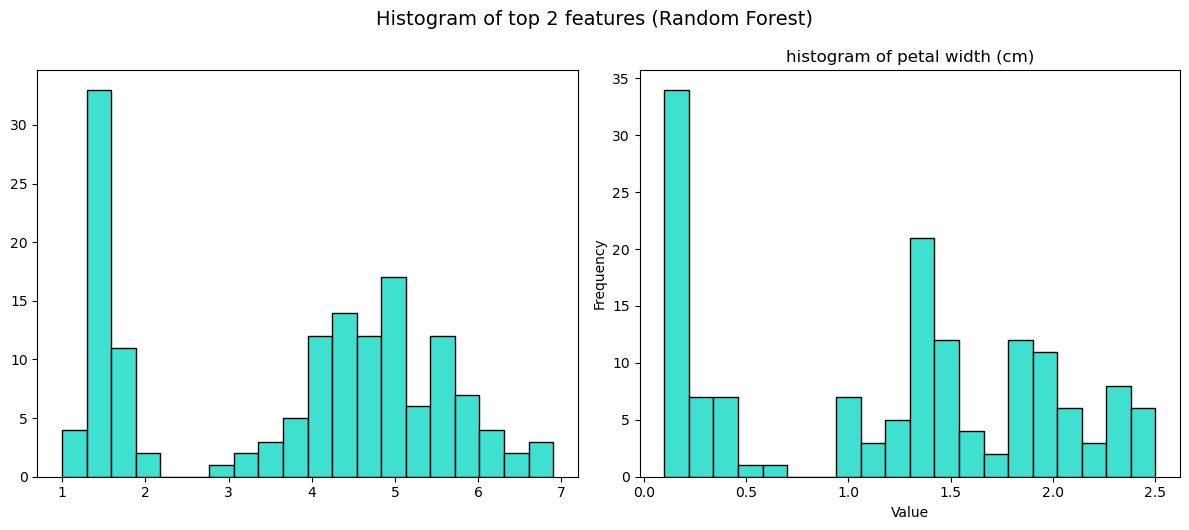

In [22]:
#Plot top random forest features 
plt.figure(figsize=(12,5))
for i,col in enumerate(top_rf_features):
    plt.subplot(1,2,i+1)
    plt.hist(x[col], bins=20,color='turquoise',edgecolor='black')
plt.title(f"histogram of {col}")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.suptitle('Histogram of top 2 features (Random Forest)', fontsize=14, y=1.05)